In [276]:
! pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm imbalanced-learn



In [277]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and model selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Machine Learning models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import xgboost as xgb
import lightgbm as lgbm

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')



In [278]:



# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# List all columns in the DataFrame
print("Columns in the DataFrame:")
print(df.columns.tolist())

# Check if 'Churn' is among the columns
if 'Churn' in df.columns:
    print("'Churn' column is present.")
else:
    print("'Churn' column is missing.")


Columns in the DataFrame:
['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
'Churn' column is present.


In [279]:
# Check for missing values in 'Churn'
missing_churn = df['Churn'].isnull().sum()
print(f"Number of missing values in 'Churn': {missing_churn}")

# Display unique values in 'Churn'
unique_churn = df['Churn'].unique()
print("Unique values in 'Churn':", unique_churn)


Number of missing values in 'Churn': 0
Unique values in 'Churn': ['Stayed' 'Churned']


In [280]:
# Map 'Stayed' to 0 and 'Churned' to 1
df['Churn'] = df['Churn'].map({'Stayed': 0, 'Churned': 1})

# Verify the mapping
unique_churn_mapped = df['Churn'].unique()
print("Unique values in 'Churn' after mapping:", unique_churn_mapped)

# Check for any unmapped or missing values
missing_churn_after_mapping = df['Churn'].isnull().sum()
print(f"Number of missing values in 'Churn' after mapping: {missing_churn_after_mapping}")


Unique values in 'Churn' after mapping: [0 1]
Number of missing values in 'Churn' after mapping: 0


In [281]:
# Drop 'customerID' column
df.drop('customerID', axis=1, inplace=True)


In [282]:
df
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,Unnamed: 0,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,64.761692,0.265370
std,2033.283305,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,1760.500000,9.000000,35.500000,0.000000
50%,3521.000000,29.000000,70.350000,0.000000
75%,5281.500000,55.000000,89.850000,1.000000
max,7042.000000,72.000000,118.750000,1.000000


In [283]:
# Get the data types of each column
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Unnamed: 0            int64
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


In [284]:
# List of categorical columns
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'
]

# List of numerical columns
numerical_cols = ['tenure', 'MonthlyCharges']


In [285]:
# Check the data type of 'TotalCharges'
print("Data type of 'TotalCharges':", df['TotalCharges'].dtype)


Data type of 'TotalCharges': object


In [286]:
# Replace spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert 'TotalCharges' to numeric, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [287]:
# Check for missing values in 'TotalCharges'
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'TotalCharges' after conversion: {missing_total_charges}")


Number of missing values in 'TotalCharges' after conversion: 11


In [288]:
# Drop rows with missing 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

# Confirm that there are no more missing values
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'TotalCharges' after dropping rows: {missing_total_charges}")


Number of missing values in 'TotalCharges' after dropping rows: 0


In [289]:
# Remove 'TotalCharges' from categorical_cols
categorical_cols.remove('TotalCharges')

# Add 'TotalCharges' to numerical_cols
numerical_cols.append('TotalCharges')


In [290]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [291]:
scaler = StandardScaler()

In [292]:
# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [293]:
# Define X and y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
print (X)
print (y)

      Unnamed: 0    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0 -1.280248       -1.161694     -0.994194        False   
1              1  0.064303       -0.260878     -0.173740         True   
2              2 -1.239504       -0.363923     -0.959649         True   
3              3  0.512486       -0.747850     -0.195248         True   
4              4 -1.239504        0.196178     -0.940457        False   
...          ...       ...             ...           ...          ...   
7038        7038 -0.343137        0.664868     -0.129180         True   
7039        7039  1.612573        1.276493      2.241056        False   
7040        7040 -0.872808       -1.170004     -0.854514        False   
7041        7041 -1.158016        0.319168     -0.872095         True   
7042        7042  1.368109        1.357932      2.012344         True   

      SeniorCitizen_Yes  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0                 False         True           Fa

In [294]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


Class distribution after SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [295]:
from sklearn.model_selection import train_test_split

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (8260, 32)
Testing set size: (2066, 32)


In [296]:
from lightgbm import LGBMClassifier


In [297]:
import lightgbm as lgb



In [298]:
lgbm = lgb.LGBMClassifier(random_state=42)


In [299]:
# Get the feature names from your dataset
feature_names = X.columns.tolist()

# Print feature names
print("Feature names:")
for name in feature_names:
    print(repr(name))


Feature names:
'Unnamed: 0'
'tenure'
'MonthlyCharges'
'TotalCharges'
'gender_Male'
'SeniorCitizen_Yes'
'Partner_Yes'
'Dependents_Yes'
'PhoneService_Yes'
'MultipleLines_No phone service'
'MultipleLines_Yes'
'InternetService_Fiber optic'
'InternetService_No'
'InternetService_dsl'
'OnlineSecurity_No internet service'
'OnlineSecurity_Yes'
'OnlineBackup_No internet service'
'OnlineBackup_Yes'
'DeviceProtection_No internet service'
'DeviceProtection_Yes'
'TechSupport_No internet service'
'TechSupport_Yes'
'StreamingTV_No internet service'
'StreamingTV_Yes'
'StreamingMovies_No internet service'
'StreamingMovies_Yes'
'Contract_One year'
'Contract_Two year'
'PaperlessBilling_Yes'
'PaymentMethod_Credit card (automatic)'
'PaymentMethod_Electronic check'
'PaymentMethod_Mailed check'


In [300]:
import re

def clean_feature_names(columns):
    # Define a regular expression pattern to match allowed characters
    pattern = re.compile(r'[^\w\s]+')  # Keeps only letters, digits, and underscores

    # Clean the column names
    clean_columns = []
    for col in columns:
        # Replace special characters with an underscore
        clean_col = pattern.sub('_', col)
        # Remove leading/trailing whitespace
        clean_col = clean_col.strip()
        clean_columns.append(clean_col)
    return clean_columns


In [301]:
# Clean the feature names
clean_columns = clean_feature_names(X.columns)

# Update the columns in the DataFrame
X.columns = clean_columns


In [302]:
# Print cleaned feature names
print("Cleaned feature names:")
for name in X.columns:
    print(repr(name))


Cleaned feature names:
'Unnamed_ 0'
'tenure'
'MonthlyCharges'
'TotalCharges'
'gender_Male'
'SeniorCitizen_Yes'
'Partner_Yes'
'Dependents_Yes'
'PhoneService_Yes'
'MultipleLines_No phone service'
'MultipleLines_Yes'
'InternetService_Fiber optic'
'InternetService_No'
'InternetService_dsl'
'OnlineSecurity_No internet service'
'OnlineSecurity_Yes'
'OnlineBackup_No internet service'
'OnlineBackup_Yes'
'DeviceProtection_No internet service'
'DeviceProtection_Yes'
'TechSupport_No internet service'
'TechSupport_Yes'
'StreamingTV_No internet service'
'StreamingTV_Yes'
'StreamingMovies_No internet service'
'StreamingMovies_Yes'
'Contract_One year'
'Contract_Two year'
'PaperlessBilling_Yes'
'PaymentMethod_Credit card _automatic_'
'PaymentMethod_Electronic check'
'PaymentMethod_Mailed check'


In [303]:
import re

def clean_feature_names(columns):
    clean_columns = []
    for col in columns:
        # Replace any non-alphanumeric character with an underscore
        clean_col = re.sub(r'\W+', '_', col)
        # Remove leading/trailing underscores
        clean_col = clean_col.strip('_')
        clean_columns.append(clean_col)
    return clean_columns


In [304]:
# Apply the cleaning function
clean_columns = clean_feature_names(X.columns)

# Update the DataFrame with cleaned feature names
X.columns = clean_columns

# Display cleaned feature names
print("Cleaned feature names:")
for name in X.columns:
    print(repr(name))


Cleaned feature names:
'Unnamed__0'
'tenure'
'MonthlyCharges'
'TotalCharges'
'gender_Male'
'SeniorCitizen_Yes'
'Partner_Yes'
'Dependents_Yes'
'PhoneService_Yes'
'MultipleLines_No_phone_service'
'MultipleLines_Yes'
'InternetService_Fiber_optic'
'InternetService_No'
'InternetService_dsl'
'OnlineSecurity_No_internet_service'
'OnlineSecurity_Yes'
'OnlineBackup_No_internet_service'
'OnlineBackup_Yes'
'DeviceProtection_No_internet_service'
'DeviceProtection_Yes'
'TechSupport_No_internet_service'
'TechSupport_Yes'
'StreamingTV_No_internet_service'
'StreamingTV_Yes'
'StreamingMovies_No_internet_service'
'StreamingMovies_Yes'
'Contract_One_year'
'Contract_Two_year'
'PaperlessBilling_Yes'
'PaymentMethod_Credit_card__automatic'
'PaymentMethod_Electronic_check'
'PaymentMethod_Mailed_check'


In [305]:
import string

# Define allowed characters (letters, digits, underscore)
allowed_chars = string.ascii_letters + string.digits + '_'

# Find feature names with disallowed characters
invalid_features = [col for col in X.columns if any(c not in allowed_chars for c in col)]

if invalid_features:
    print("Feature names with invalid characters:")
    for col in invalid_features:
        print(repr(col))
else:
    print("All feature names are valid.")


All feature names are valid.


In [306]:
# Retrieve the feature names
feature_names = X.columns.tolist()

# Print feature names along with their ASCII codes
print("Feature names and their ASCII codes:")
for name in feature_names:
    ascii_codes = [ord(c) for c in name]
    print(f"{repr(name)} : {ascii_codes}")


Feature names and their ASCII codes:
'Unnamed__0' : [85, 110, 110, 97, 109, 101, 100, 95, 95, 48]
'tenure' : [116, 101, 110, 117, 114, 101]
'MonthlyCharges' : [77, 111, 110, 116, 104, 108, 121, 67, 104, 97, 114, 103, 101, 115]
'TotalCharges' : [84, 111, 116, 97, 108, 67, 104, 97, 114, 103, 101, 115]
'gender_Male' : [103, 101, 110, 100, 101, 114, 95, 77, 97, 108, 101]
'SeniorCitizen_Yes' : [83, 101, 110, 105, 111, 114, 67, 105, 116, 105, 122, 101, 110, 95, 89, 101, 115]
'Partner_Yes' : [80, 97, 114, 116, 110, 101, 114, 95, 89, 101, 115]
'Dependents_Yes' : [68, 101, 112, 101, 110, 100, 101, 110, 116, 115, 95, 89, 101, 115]
'PhoneService_Yes' : [80, 104, 111, 110, 101, 83, 101, 114, 118, 105, 99, 101, 95, 89, 101, 115]
'MultipleLines_No_phone_service' : [77, 117, 108, 116, 105, 112, 108, 101, 76, 105, 110, 101, 115, 95, 78, 111, 95, 112, 104, 111, 110, 101, 95, 115, 101, 114, 118, 105, 99, 101]
'MultipleLines_Yes' : [77, 117, 108, 116, 105, 112, 108, 101, 76, 105, 110, 101, 115, 95, 89, 1

In [307]:
import re

def clean_feature_names_thoroughly(columns):
    clean_columns = []
    for col in columns:
        # Remove any non-printable characters
        col = ''.join(c for c in col if c.isprintable())
        # Replace any special JSON characters with an underscore
        col = col.replace('\\', '_').replace('"', '_').replace('/', '_')
        col = col.replace('[', '_').replace(']', '_').replace('{', '_').replace('}', '_')
        col = col.replace(',', '_').replace(':', '_').replace(';', '_').replace('\'', '_')
        # Replace any non-alphanumeric characters with an underscore
        col = re.sub(r'\W+', '_', col)
        # Remove leading/trailing underscores
        col = col.strip('_')
        clean_columns.append(col)
    return clean_columns


In [308]:
# Apply the thorough cleaning function
X.columns = clean_feature_names_thoroughly(X.columns)


In [309]:
# Print cleaned feature names and their ASCII codes
print("Cleaned feature names and their ASCII codes:")
for name in X.columns:
    ascii_codes = [ord(c) for c in name]
    print(f"{repr(name)} : {ascii_codes}")


Cleaned feature names and their ASCII codes:
'Unnamed__0' : [85, 110, 110, 97, 109, 101, 100, 95, 95, 48]
'tenure' : [116, 101, 110, 117, 114, 101]
'MonthlyCharges' : [77, 111, 110, 116, 104, 108, 121, 67, 104, 97, 114, 103, 101, 115]
'TotalCharges' : [84, 111, 116, 97, 108, 67, 104, 97, 114, 103, 101, 115]
'gender_Male' : [103, 101, 110, 100, 101, 114, 95, 77, 97, 108, 101]
'SeniorCitizen_Yes' : [83, 101, 110, 105, 111, 114, 67, 105, 116, 105, 122, 101, 110, 95, 89, 101, 115]
'Partner_Yes' : [80, 97, 114, 116, 110, 101, 114, 95, 89, 101, 115]
'Dependents_Yes' : [68, 101, 112, 101, 110, 100, 101, 110, 116, 115, 95, 89, 101, 115]
'PhoneService_Yes' : [80, 104, 111, 110, 101, 83, 101, 114, 118, 105, 99, 101, 95, 89, 101, 115]
'MultipleLines_No_phone_service' : [77, 117, 108, 116, 105, 112, 108, 101, 76, 105, 110, 101, 115, 95, 78, 111, 95, 112, 104, 111, 110, 101, 95, 115, 101, 114, 118, 105, 99, 101]
'MultipleLines_Yes' : [77, 117, 108, 116, 105, 112, 108, 101, 76, 105, 110, 101, 115, 9

In [310]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [311]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [312]:
# Clean the feature names in X_resampled
X_resampled.columns = clean_feature_names_thoroughly(X_resampled.columns)


In [313]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


In [314]:
# Apply SMOTE to X and y
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [315]:
# Clean the feature names in X_resampled
X_resampled.columns = clean_feature_names_thoroughly(X_resampled.columns)


In [316]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


In [317]:
# Import LGBMClassifier
from lightgbm import LGBMClassifier

# Instantiate the model
lgbm = LGBMClassifier(random_state=42)

# Train the model
lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 4134, number of negative: 4126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500484 -> initscore=0.001937
[LightGBM] [Info] Start training from score 0.001937


LGBMClassifier(random_state=42)

In [318]:
print(f"X_resampled shape: {X_resampled.shape}")
print(f"y_resampled length: {len(y_resampled)}")


X_resampled shape: (10326, 32)
y_resampled length: 10326


In [319]:
print(f"X shape: {X.shape}")
print(f"y length: {len(y)}")

print(f"X_resampled shape: {X_resampled.shape}")
print(f"y_resampled length: {len(y_resampled)}")


X shape: (7032, 32)
y length: 7032
X_resampled shape: (10326, 32)
y_resampled length: 10326


In [320]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Print classification report
    print(f"----- {model_name} -----")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    # Return metrics
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc
    }


----- Random Forest -----
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.58      0.58      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



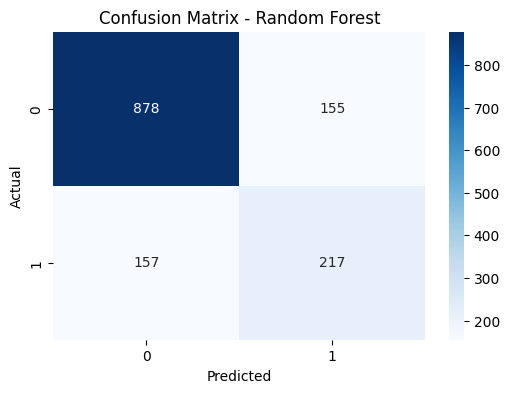

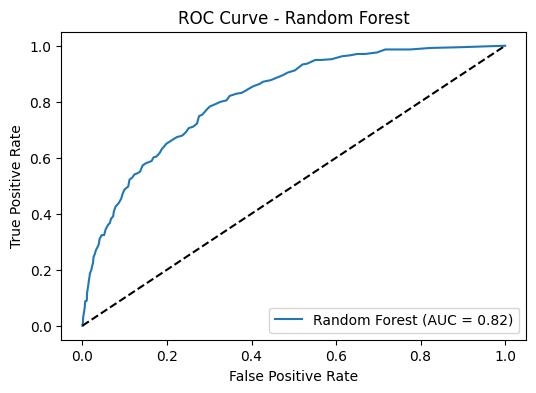

----- XGBoost -----
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.57      0.57      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



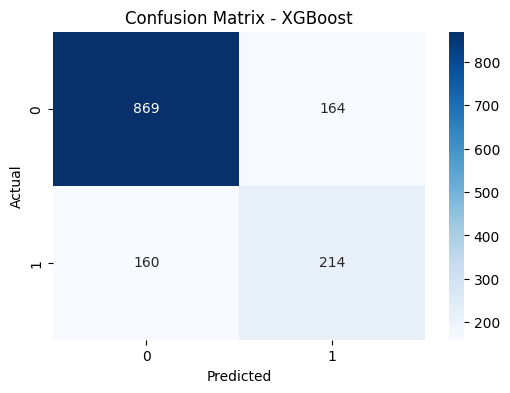

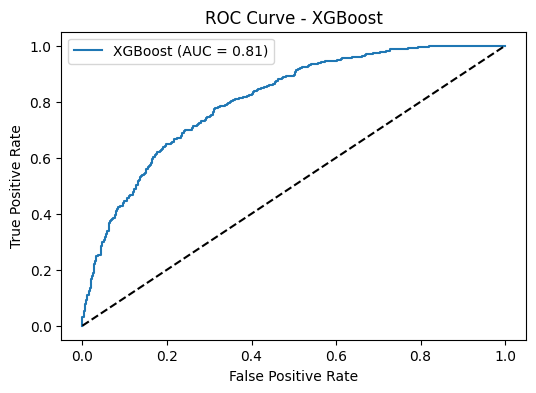

----- LightGBM -----
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.60      0.59      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



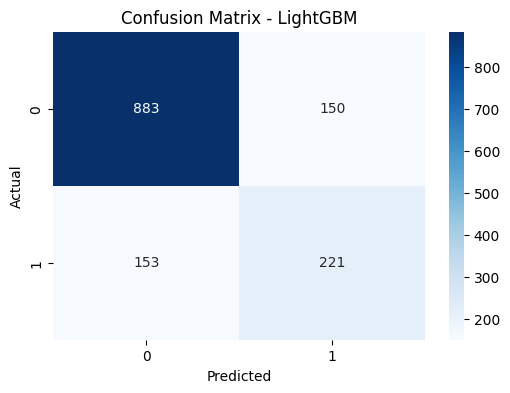

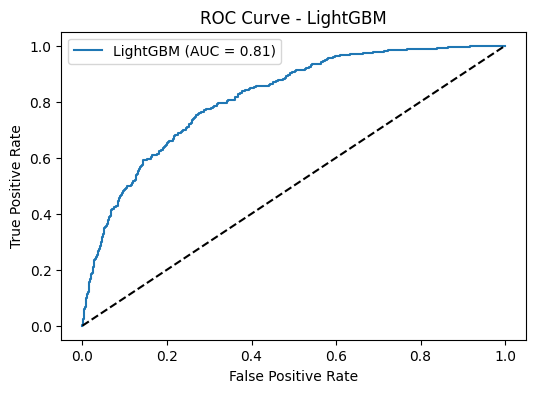

In [327]:
# Assuming you have trained models: rf, xg, lgbm, stack

# Evaluate Random Forest
rf_metrics = evaluate_model(rf, X_test, y_test, "Random Forest")

# Evaluate XGBoost
xg_metrics = evaluate_model(xg, X_test, y_test, "XGBoost")

# Evaluate LightGBM
lgbm_metrics = evaluate_model(lgbm, X_test, y_test, "LightGBM")

# If you have a Stacking Classifier
# stack_metrics = evaluate_model(stack, X_test, y_test, "Stacking Classifier")


In [328]:
import pandas as pd

# Collect metrics into a list
metrics_list = [rf_metrics, xg_metrics, lgbm_metrics]  # Add stack_metrics if applicable

# Create DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Set the model name as the index
metrics_df.set_index('Model', inplace=True)

# Display the comparison table
print("Model Performance Comparison:")
display(metrics_df)


Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Random Forest,0.778252,0.583333,0.580214,0.581769,0.816987
XGBoost,0.769723,0.566138,0.572193,0.569149,0.806322
LightGBM,0.784648,0.595687,0.590909,0.593289,0.814990


In [322]:


# Apply one-hot encoding to the categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Clean the feature names
df_encoded.columns = clean_feature_names(df_encoded.columns)

# Update X and y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Now apply scaling, if needed


In [323]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [324]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [325]:
# Random Forest
rf.fit(X_train_res, y_train_res)

# XGBoost
xg.fit(X_train_res, y_train_res)

# LightGBM
lgbm.fit(X_train_res, y_train_res)


[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

----- Random Forest -----
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.58      0.58      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



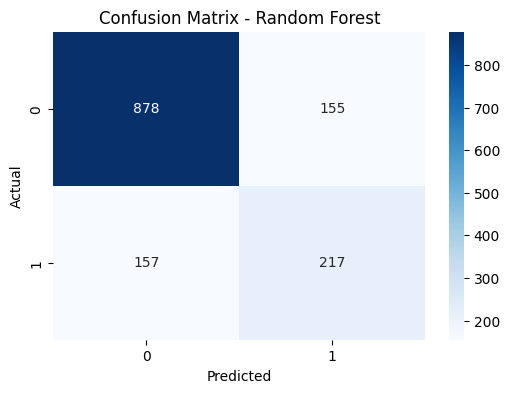

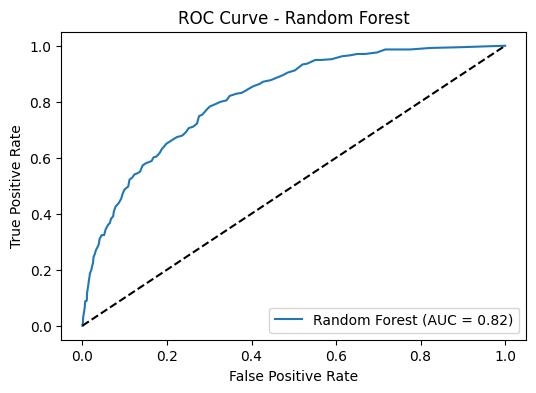

----- XGBoost -----
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.57      0.57      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



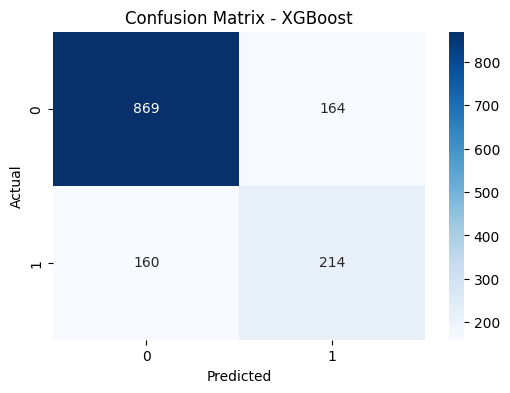

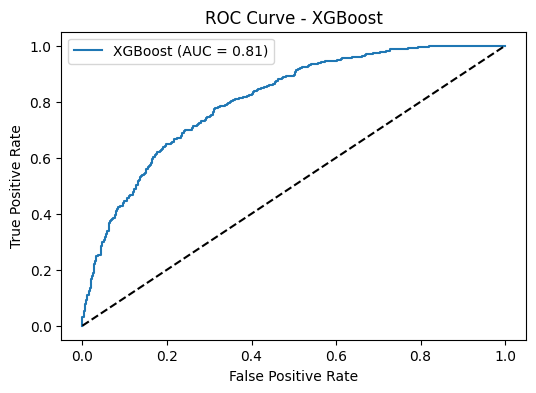

----- LightGBM -----
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.60      0.59      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



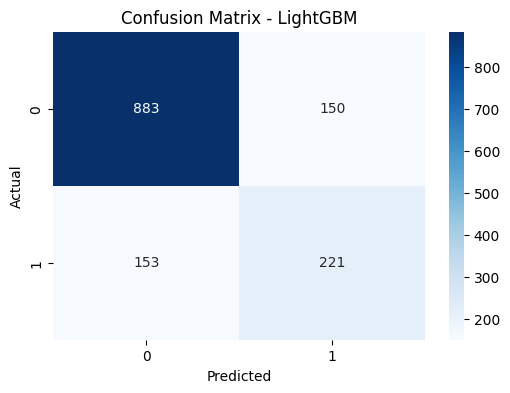

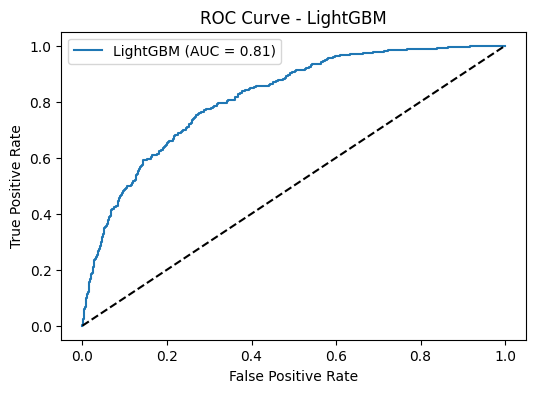

In [326]:
# Evaluate Random Forest
rf_metrics = evaluate_model(rf, X_test, y_test, "Random Forest")

# Evaluate XGBoost
xg_metrics = evaluate_model(xg, X_test, y_test, "XGBoost")

# Evaluate LightGBM
lgbm_metrics = evaluate_model(lgbm, X_test, y_test, "LightGBM")
